# Titel

Students: Casper Sikkema, Joshua Appiah

Team Number: B6


## Inhoudsopgave:
* [Introduction](#Introduction)
* [Dataset and Preprocessing](#Dataset-and-Preprocessing)
  * [Cleaning](#Cleaning)
  * [Variables](#Variables)
* [Reflection](#Reflection)
* [Work Distribution](#work-distribution)
* [References](#references)


## Introduction

TODO: Describe the topic, perspectives, and arguments.

Schiphol Airport, the largest airport in the Netherlands, welcomed 62 million passengers in 2023. With its 65,000 employees, Schiphol has a significant positive influence on the Dutch economy. However, Schiphol also has a substantial negative impact on local residents and the environment. The primary concerns include the emission of fine particulate matter and noise pollution from airplanes. The limit on the number of aircraft movements at Schiphol has therefore been a much-discussed topic since 2008, when it was decided that a ceiling of 500,000 flights would be implemented until 2020. Afterward, the total aircraft movements were to decrease by 10% every year as proposed by the Dutch Parliament. However, due to pressure from companies like KLM and countries like the United States and Canada, the proposed reduction of Schiphol's operations has been delayed. To accommodate local residents, Schiphol has decided to reduce the movement of private airplanes and implement a "nightstop" from 00:00 to 05:00 starting in 2025/2026.

This data story, on behalf of "Data Visualization" at the University of Amsterdam, will explore the total aircraft movements at Schiphol Airport from 1992 to the present and their influence on the emission of harmful substances. In particular, we will examine the correlation between `total aircraft movements`, `cargo (in tonnes)`, and `emissions (in kg)`. Datasets provided by Schiphol and the 'Rijksoverheid' will be used.

First, we will provide an insight into the datasets used, including how they were found and processed. Following this, we will discuss the perspectives and arguments using visualization components and text. To conclude, a reflection and work distribution will be provided


In [1]:
# Packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset and Preprocessing

TODO: Provide information about the datasets (e.g., where to download them, what
are the variables in there) and also explain how you preprocess the data.

After settling on the topic of Schiphol, we started searching for our datasets. The [first dataset](https://www.schiphol.nl/nl/schiphol-group/pagina/verkeer-en-vervoer-cijfers/), provided by Schiphol, contains information about the monthly traffic at Schiphol since January 1992. Finding a second dataset was more challenging than expected. Many of the RIVM datasets were provided in `.rdf` format and contained insufficient data or were unable to be read at all. We then stumbled upon a dataset containing the emission of fine particulate matter as measured from eight measuring points around Schiphol. Although this dataset was exactly what we were looking for, it only contained data from 2017 and 2018. Having not found an alternative, we used this dataset for the project proposal. After the proposal, we found a [third dataset](https://www.emissieregistratie.nl/data/vliegvelden), provided by the 'Rijksoverheid', containing the emission of a number of substances from 1990 till 2022 at different airports in the Netherlands. The first and third datasets were used for the final deliverable.

In [2]:
# Load the cleaned Schiphol Traffic dataset

df = pd.read_csv("Traffic_Data_Cleaned.csv")
#df

# https://www.schiphol.nl/nl/schiphol-group/pagina/verkeer-en-vervoer-cijfers/

FileNotFoundError: [Errno 2] No such file or directory: 'Traffic_Data_Cleaned.csv'

In [76]:
# Loead the cleaned yearly SchipholTtraffic dataset

df_yearly = pd.read_csv("Yearly_Traffic_Data_Cleaned.csv")
df_yearly

,Year,Air_Transport_Movements_Europe,Air_Transport_Movements_Intercontinental,Air_Transport_Movements_Total,Passengers_Europe,Passengers_Intercontinental,Passengers_Total*,Passengers_O&D,Passengers_Transfer,Passengers_Total*.1,Passengers_Scheduled,Passengers_Non Scheduled,Passengers_Transit direct,Passengers_Total,Cargo (tonnes),Mail (tonnes)
0,1992,200566.0,38246.0,238812.0,12628221.0,6084369.0,18712590.0,12965174.0,5747416.0,18712590.0,15618006.0,3094584.0,432474.0,19145064.0,695040.0,28799.0
1,1993,216872.0,42803.0,259675.0,13884524.0,6885688.0,20770212.0,13094576.0,7675636.0,20770212.0,17715938.0,3054274.0,504057.0,21274269.0,775378.0,33589.0
2,1994,228163.0,45901.0,274064.0,15357944.0,7711763.0,23069707.0,14410593.0,8659114.0,23069707.0,19883172.0,3186535.0,490091.0,23559798.0,837904.0,36574.0
3,1995,239275.0,51415.0,290690.0,16248508.0,8608198.0,24856706.0,15231696.0,9625010.0,24856706.0,21480170.0,3376536.0,498295.0,25355001.0,977531.0,41784.0
4,1996,265804.0,55976.0,321780.0,17671327.0,9590717.0,27262044.0,16312216.0,10949828.0,27262044.0,23789314.0,3472730.0,532837.0,27794881.0,1082846.0,41806.0
5,1997,290064.0,59412.0,349476.0,20389033.0,10631969.0,31021002.0,17929440.0,13091562.0,31021002.0,27304883.0,3716119.0,548975.0,31569977.0,1161234.0,46048.0
6,1998,314549.0,62261.0,376810.0,22626274.0,11325874.0,33952148.0,19608768.0,14343380.0,33952148.0,29956021.0,3996127.0,467995.0,34420143.0,1171256.0,4749.0
7,1999,329684.0,63922.0,393606.0,24282534.0,12142579.0,36425113.0,20950665.0,15474448.0,36425113.0,32099376.0,4325737.0,346902.0,36772015.0,1180717.0,44567.0
8,2000,348720.0,66208.0,414928.0,26360776.0,12909834.0,39270610.0,22723260.0,16547350.0,39270610.0,34496436.0,4774174.0,336315.0,39606925.0,1222594.0,44792.0
9,2001,348697.0,67765.0,416462.0,26801533.0,12507908.0,39309441.0,23284957.0,16024484.0,39309441.0,34597071.0,4712370.0,221682.0,39531123.0,1183208.0,50953.0


In [75]:
# Load the cleaned Schiphol Emissie dataset

df_emission = pd.read_csv("Schiphol_Emissie_Cleaned.csv")
df_emission

# https://www.emissieregistratie.nl/data/vliegvelden

,EMISSIEJAAR,VLIEGVELD,VLIEGVELD_CODE,STOFNAAM,STOF_CODE,COMPARTIMENT,COMPARTIMENT_CODE,EMISSIEOORZAAK,EMISSIEOORZAAK_CODE,EMISSIE (kg)
0,1990,Vliegveld Luchthaven Schiphol,220801,Anthraceen,535,Lucht,10,"Vliegverkeer, APU",930005,"0,010647538"
1,1990,Vliegveld Luchthaven Schiphol,220801,Benzeen,515,Lucht,10,"Vliegverkeer, APU",930005,"109,275126"
2,1990,Vliegveld Luchthaven Schiphol,220801,Benzo(a)Pyreen,539,Lucht,10,"Vliegverkeer, APU",930005,"0,003642579"
3,1990,Vliegveld Luchthaven Schiphol,220801,Benzo(b)Fluorantheen,540,Lucht,10,"Vliegverkeer, APU",930005,"0,007285158"
4,1990,Vliegveld Luchthaven Schiphol,220801,Benzo(k)Fluorantheen,541,Lucht,10,"Vliegverkeer, APU",930005,"0,001905349"
...,...,...,...,...,...,...,...,...,...,...
2955,2022,Vliegveld Luchthaven Schiphol,220801,Loodverb. (als Pb),111,Lucht,10,"Vliegverkeer, Remslijtage",930009,"2,177753808"
2956,2022,Vliegveld Luchthaven Schiphol,220801,Nikkelverb. (als Ni),114,Lucht,10,"Vliegverkeer, Remslijtage",930009,"5,008833758"
2957,2022,Vliegveld Luchthaven Schiphol,220801,TSP (Totaal stof),999,Lucht,10,"Vliegverkeer, Remslijtage",930009,"5444,384519"
2958,2022,Vliegveld Luchthaven Schiphol,220801,Zinkverb. (als Zn),120,Lucht,10,"Vliegverkeer, Remslijtage",930009,"81,66576779"


### Cleaning

All the datasets came in `.xlsx` format and were adjusted to `.csv` to be further processed using the Pyhton pandas library. 

The first dataset, containing Schiphol airport's monthly traffic data, was cleaned first. Initially, we removed all unnamed columns and rows that only served a visual purpose in the original .xlsx file. We also ensured that all string types were converted to float types where necessary. Next, we decided to save the total yearly data instead of the total monthly data. This decision was made because the second dataset also presented its information per year.

The second dataset contained the emission data for all airports in the Netherlands, with 12 columns and 40,316 rows, of which only 2,960 rows contained information about Schiphol airport. We isolated these rows and saved them in a new dataframe. To further clean up the dataset, we dropped irrelevant columns.

### Variables

The variables in the first and second dataset can be classified under:

- Continuous / Ratio variables:
`Year`
`Air_Transport_Movements_Europe`
`Air_Transport_Movements_Intercontinental`
`Air_Transport_Movements_Total`
`Passengers_Europe`
`Passengers_Intercontinental`
`Passengers_Total*`
`Passengers_O&D`
`Passengers_Transfer`
`Passengers_Total*.1`
`Passengers_Scheduled`
`Passengers_Non Scheduled`
`Passengers_Transit direct`
`Passengers_Total`
`Cargo (tonnes)`
`Mail (tonnes)`
`EMISSIE (kg)`

- Discrete / Ordinal variables: None in the given datasets.
- 
Discrete / Nominal variables:
`VLIEGVELD`
`VLIEGVELD_CODE`
`STOFNAAM`
`STOF_CODE`
`COMPARTIMENT`
`COMPARTIMENT_CODE`
`EMISSIEOORZAAK`
`EMISSIEOORZAAK_CODE`

- Discrete / Interval variables: None in the given datasets.

- Discrete / Ratio variables: None in the given datasets.

## Datastory Titel TODO

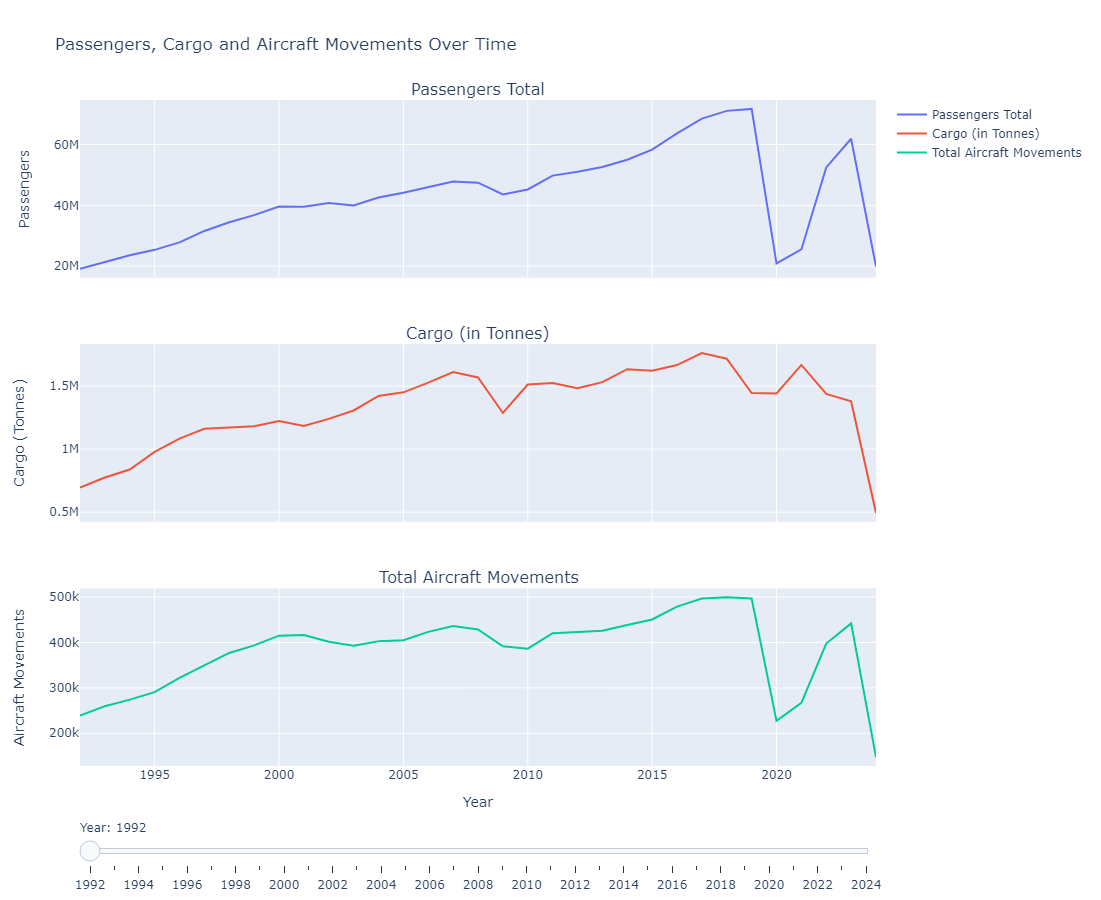

In [121]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the dataset
df_yearly = pd.read_csv("Yearly_Traffic_Data_Cleaned.csv")

# Create subplots
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    subplot_titles=(
        "Passengers Total",
        "Cargo (in Tonnes)",
        "Total Aircraft Movements"
    )
)

# Add traces for each subplot
trace1 = go.Scatter(x=df_yearly['Year'], y=df_yearly['Passengers_Total'], mode='lines', name='Passengers Total')
trace2 = go.Scatter(x=df_yearly['Year'], y=df_yearly['Cargo (tonnes)'], mode='lines', name='Cargo (in Tonnes)')
trace3 = go.Scatter(x=df_yearly['Year'], y=df_yearly['Air_Transport_Movements_Total'], mode='lines', name='Total Aircraft Movements')

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)
fig.add_trace(trace3, row=3, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Year", row=3, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Passengers", row=1, col=1)
fig.update_yaxes(title_text="Cargo (Tonnes)", row=2, col=1)
fig.update_yaxes(title_text="Aircraft Movements", row=3, col=1)

# Create slider steps
years = df_yearly['Year'].unique()
steps = []
for i, year in enumerate(years):
    visible = [False] * len(fig.data)
    visible[0:i+1] = [True] * (i + 1)
    step = dict(
        method='update',
        args=[{'visible': visible}],
        label=str(year)
    )
    steps.append(step)

# Create and add sliders
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title_text="Passengers, Cargo and Aircraft Movements Over Time",
    height=900,
    width=1000
)

# Show the plot
fig.show()


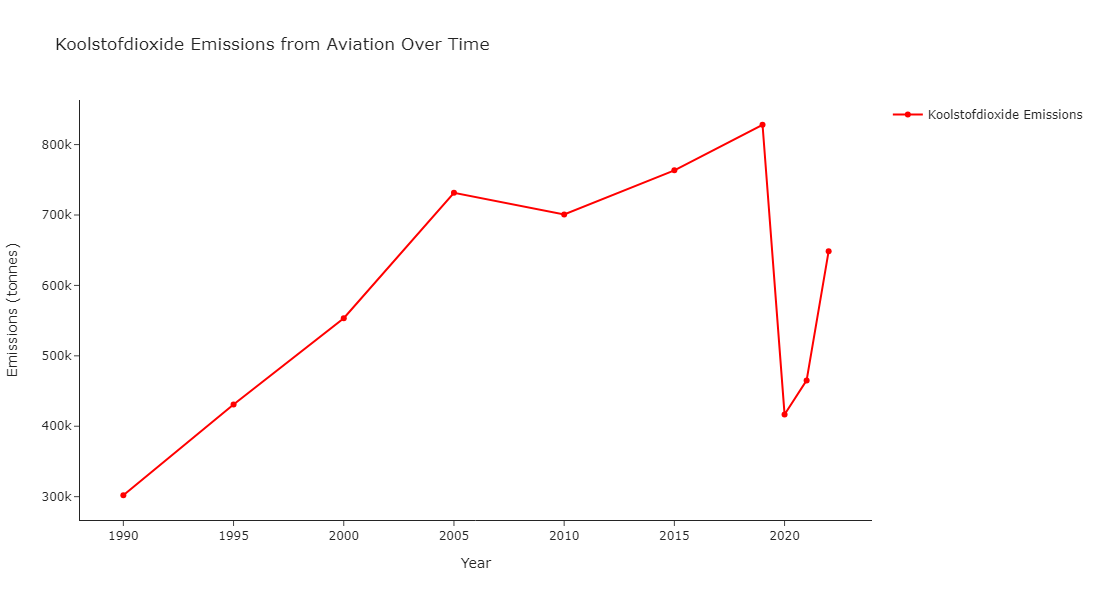

In [124]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
df_emission = pd.read_csv("Schiphol_Emissie_Cleaned.csv")

# Preprocess the dataset
df_emission['EMISSIE (kg)'] = df_emission['EMISSIE (kg)'].str.replace(',', '.').astype(float)

# Filter the data for "Koolstofdioxide"
df_koolstofdioxide = df_emission[df_emission['STOFNAAM'] == 'Koolstofdioxide']

# Aggregate the data by year
df_koolstofdioxide_yearly = df_koolstofdioxide.groupby('EMISSIEJAAR')['EMISSIE (kg)'].sum().reset_index()

# Convert emissions to tonnes for better visualization
df_koolstofdioxide_yearly['EMISSIE (tonnes)'] = df_koolstofdioxide_yearly['EMISSIE (kg)'] / 1000

# Create the plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_koolstofdioxide_yearly['EMISSIEJAAR'],
    y=df_koolstofdioxide_yearly['EMISSIE (tonnes)'],
    mode='lines+markers',
    name='Koolstofdioxide Emissions',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Koolstofdioxide Emissions from Aviation Over Time',
    xaxis_title='Year',
    yaxis_title='Emissions (tonnes)',
    height=600,
    width=900,
    template='simple_white',
    showlegend=True
)

# Show the plot
fig.show()


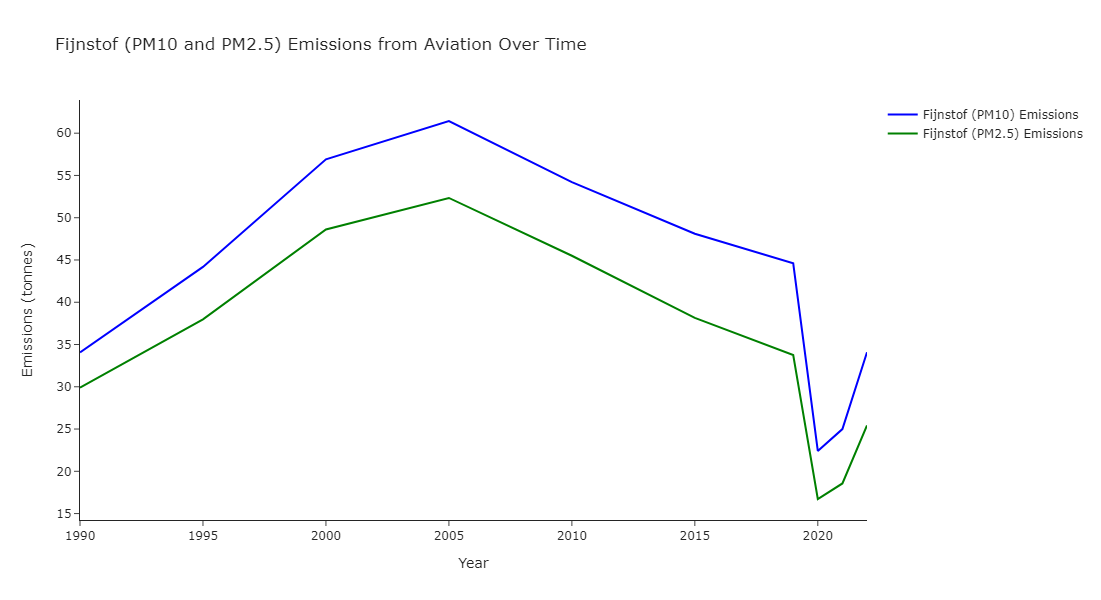

In [125]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
df_emission = pd.read_csv("Schiphol_Emissie_Cleaned.csv")

# Preprocess the dataset
df_emission['EMISSIE (kg)'] = df_emission['EMISSIE (kg)'].str.replace(',', '.').astype(float)

# Filter the data for "Fijnstof (PM10)" and "Fijnstof (PM2.5)"
df_fijnstof_pm10 = df_emission[df_emission['STOFNAAM'] == 'Fijnstof (PM10)']
df_fijnstof_pm25 = df_emission[df_emission['STOFNAAM'] == 'Fijnstof (PM2,5)']

# Aggregate the data by year for each type of Fijnstof
df_fijnstof_pm10_yearly = df_fijnstof_pm10.groupby('EMISSIEJAAR')['EMISSIE (kg)'].sum().reset_index()
df_fijnstof_pm25_yearly = df_fijnstof_pm25.groupby('EMISSIEJAAR')['EMISSIE (kg)'].sum().reset_index()

# Convert emissions to tonnes for better visualization
df_fijnstof_pm10_yearly['EMISSIE (tonnes)'] = df_fijnstof_pm10_yearly['EMISSIE (kg)'] / 1000
df_fijnstof_pm25_yearly['EMISSIE (tonnes)'] = df_fijnstof_pm25_yearly['EMISSIE (kg)'] / 1000

# Create the plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_fijnstof_pm10_yearly['EMISSIEJAAR'],
    y=df_fijnstof_pm10_yearly['EMISSIE (tonnes)'],
    mode='lines',
    name='Fijnstof (PM10) Emissions',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=df_fijnstof_pm25_yearly['EMISSIEJAAR'],
    y=df_fijnstof_pm25_yearly['EMISSIE (tonnes)'],
    mode='lines',
    name='Fijnstof (PM2.5) Emissions',
    line=dict(color='green')
))

# Update layout
fig.update_layout(
    title='Fijnstof (PM10 and PM2.5) Emissions from Aviation Over Time',
    xaxis_title='Year',
    yaxis_title='Emissions (tonnes)',
    height=600,
    width=900,
    template='simple_white',
    showlegend=True
)

# Show the plot
fig.show()


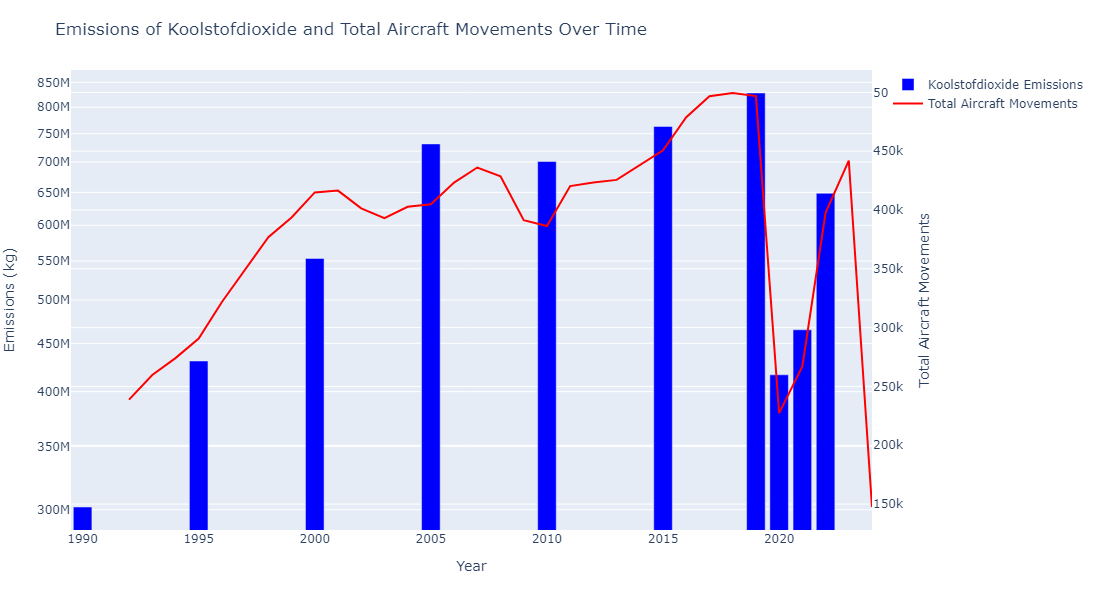

In [131]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Load the datasets
df_emission = pd.read_csv("Schiphol_Emissie_Cleaned.csv")
df_yearly = pd.read_csv("Yearly_Traffic_Data_Cleaned.csv")

# Preprocess the emission dataset
df_emission['EMISSIE (kg)'] = df_emission['EMISSIE (kg)'].str.replace(',', '.').astype(float)

# Filter the data for "Koolstofdioxide"
df_koolstofdioxide = df_emission[df_emission['STOFNAAM'] == 'Koolstofdioxide']

# Aggregate the data by year and substance
df_aggregated = df_koolstofdioxide.groupby(['EMISSIEJAAR', 'STOFNAAM']).sum().reset_index()

# Create the bar chart for Koolstofdioxide emissions
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_aggregated['EMISSIEJAAR'],
    y=df_aggregated['EMISSIE (kg)'],
    name='Koolstofdioxide Emissions',
    marker_color='blue'
))

# Add the line for total aircraft movements
fig.add_trace(go.Scatter(
    x=df_yearly['Year'],
    y=df_yearly['Air_Transport_Movements_Total'],
    mode='lines',
    name='Total Aircraft Movements',
    line=dict(color='red'),
    yaxis='y2'
))

# Update layout for the plot
fig.update_layout(
    title="Emissions of Koolstofdioxide and Total Aircraft Movements Over Time",
    xaxis_title="Year",
    yaxis_title="Emissions (kg)",
    yaxis_type="log",
    yaxis2=dict(
        title="Total Aircraft Movements",
        overlaying='y',
        side='right'
    ),
    height=600,
    width=1000,
    margin=dict(l=50, r=50, t=70, b=70),
    showlegend=True
)

# Show the plot
fig.show()


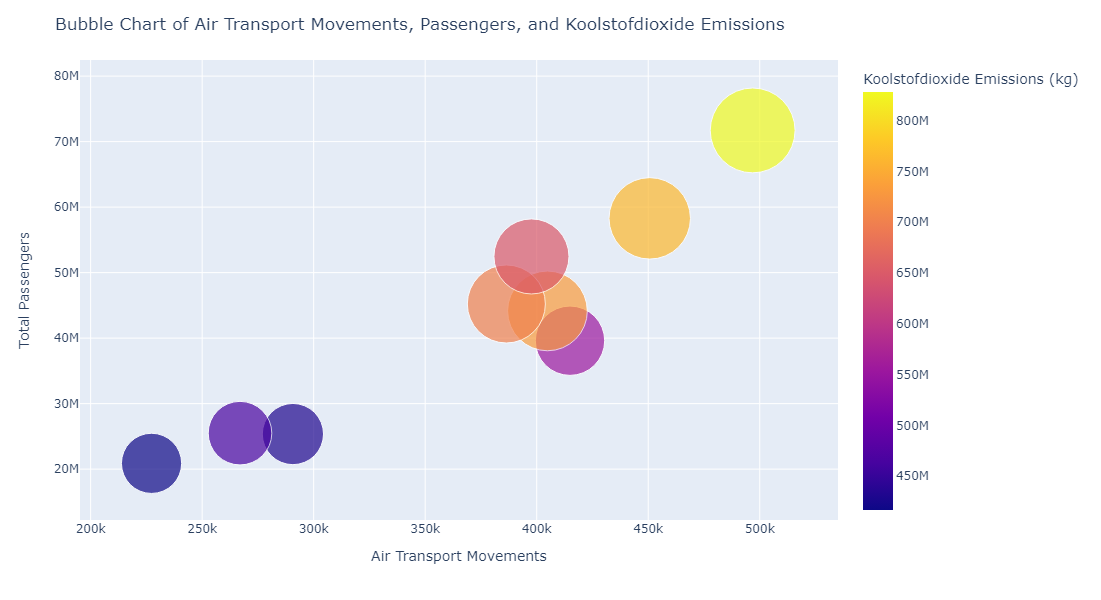

In [136]:
import pandas as pd
import plotly.express as px

# Load the datasets
df_emission = pd.read_csv("Schiphol_Emissie_Cleaned.csv")
df_yearly = pd.read_csv("Yearly_Traffic_Data_Cleaned.csv")

# Preprocess the emission dataset
df_emission['EMISSIE (kg)'] = df_emission['EMISSIE (kg)'].str.replace(',', '.').astype(float)

# Filter the data for "Koolstofdioxide"
df_koolstofdioxide = df_emission[df_emission['STOFNAAM'] == 'Koolstofdioxide']

# Aggregate the data by year
df_aggregated = df_koolstofdioxide.groupby('EMISSIEJAAR')['EMISSIE (kg)'].sum().reset_index()

# Merge with the yearly traffic data
df_combined = pd.merge(df_yearly, df_aggregated, left_on='Year', right_on='EMISSIEJAAR', how='inner')

# Drop unnecessary columns and handle any missing values if needed
df_combined.drop(columns=['EMISSIEJAAR'], inplace=True)
df_combined.fillna(0, inplace=True)

# Create the bubble chart
fig = px.scatter(df_combined, 
                 x='Air_Transport_Movements_Total', 
                 y='Passengers_Total', 
                 size='EMISSIE (kg)', 
                 color='EMISSIE (kg)',  
                 hover_name='Year',
                 hover_data={
                     'Air_Transport_Movements_Total': True,
                     'Passengers_Total': True,
                     'EMISSIE (kg)': True,
                     'Year': False  # Set to False to avoid duplication
                 },
                 size_max=60,
                 labels={
                     'Air_Transport_Movements_Total': 'Air Transport Movements',
                     'Passengers_Total': 'Total Passengers',
                     'EMISSIE (kg)': 'Koolstofdioxide Emissions (kg)'
                 })

# Update layout for the plot
fig.update_layout(
    title="Bubble Chart of Air Transport Movements, Passengers, and Koolstofdioxide Emissions",
    xaxis_title="Air Transport Movements",
    yaxis_title="Total Passengers",
    height=600,
    width=1000
)

# Show the plot
fig.show()


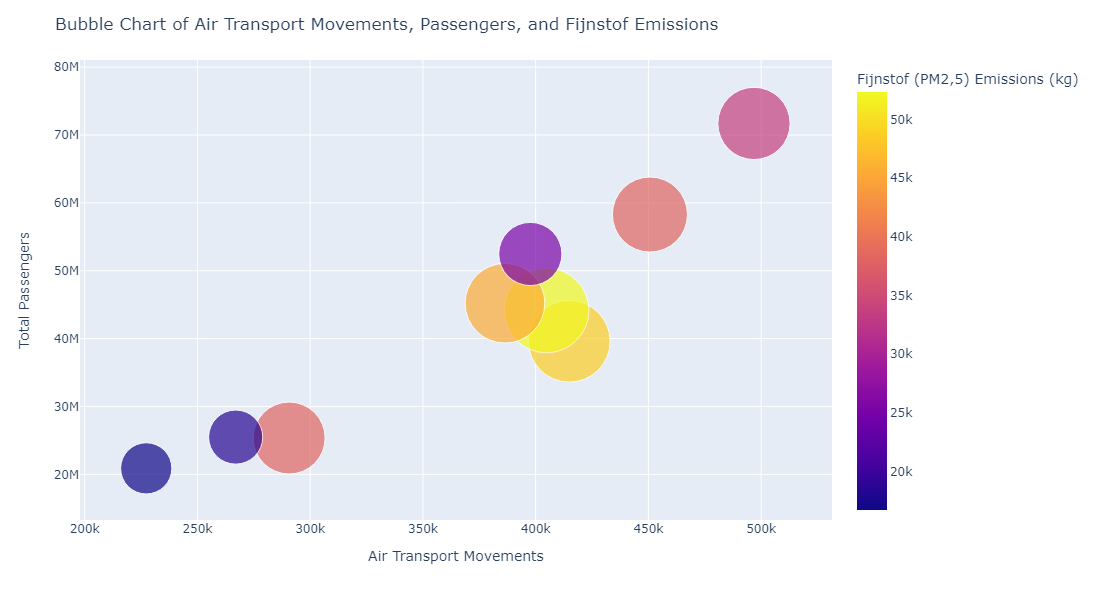

In [142]:
import pandas as pd
import plotly.express as px

# Load the datasets
df_emission = pd.read_csv("Schiphol_Emissie_Cleaned.csv")
df_yearly = pd.read_csv("Yearly_Traffic_Data_Cleaned.csv")

# Preprocess the emission dataset
df_emission['EMISSIE (kg)'] = df_emission['EMISSIE (kg)'].str.replace(',', '.').astype(float)

# Filter the data for "Fijnstof (PM10)" and "Fijnstof (PM2,5)"
df_fijnstof = df_emission[df_emission['STOFNAAM'].isin(['Fijnstof (PM10)', 'Fijnstof (PM2,5)'])]

# Aggregate the data by year and substance
df_aggregated = df_fijnstof.groupby(['EMISSIEJAAR', 'STOFNAAM'])['EMISSIE (kg)'].sum().unstack().reset_index()

# Merge with the yearly traffic data
df_combined = pd.merge(df_yearly, df_aggregated, left_on='Year', right_on='EMISSIEJAAR', how='inner')

# Drop unnecessary columns and handle any missing values if needed
df_combined.drop(columns=['EMISSIEJAAR'], inplace=True)
df_combined.fillna(0, inplace=True)

# Create the bubble chart
fig = px.scatter(df_combined, 
                 x='Air_Transport_Movements_Total', 
                 y='Passengers_Total', 
                 size='Fijnstof (PM10)', 
                 color='Fijnstof (PM2,5)',  
                 hover_name='Year',
                 hover_data={
                     'Air_Transport_Movements_Total': True,
                     'Passengers_Total': True,
                     'Fijnstof (PM10)': True,
                     'Fijnstof (PM2,5)': True,
                     'Year': False  # Set to False to avoid duplication
                 },
                 size_max=60,
                 labels={
                     'Air_Transport_Movements_Total': 'Air Transport Movements',
                     'Passengers_Total': 'Total Passengers',
                     'Fijnstof (PM10)': 'Fijnstof (PM10) Emissions (kg)',
                     'Fijnstof (PM2,5)': 'Fijnstof (PM2,5) Emissions (kg)'
                 })

# Update layout for the plot
fig.update_layout(
    title="Bubble Chart of Air Transport Movements, Passengers, and Fijnstof Emissions",
    xaxis_title="Air Transport Movements",
    yaxis_title="Total Passengers",
    height=600,
    width=1000
)

# Show the plot
fig.show()


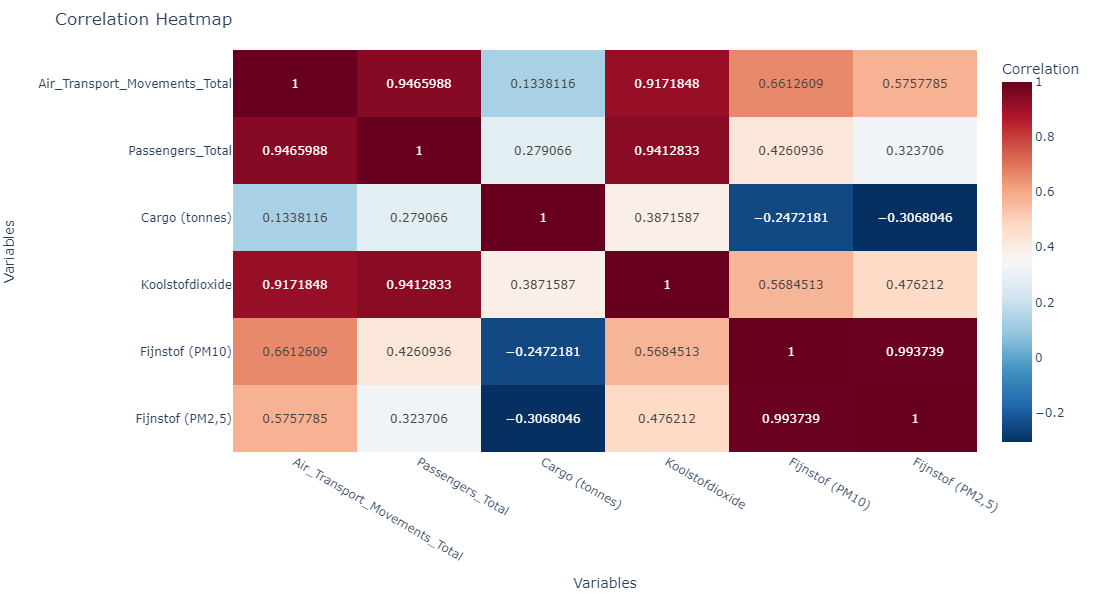

In [133]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the datasets
df_emission = pd.read_csv("Schiphol_Emissie_Cleaned.csv")
df_yearly = pd.read_csv("Yearly_Traffic_Data_Cleaned.csv")

# Preprocess the emission dataset
df_emission['EMISSIE (kg)'] = df_emission['EMISSIE (kg)'].str.replace(',', '.').astype(float)

# Filter the data for "Koolstofdioxide", "Fijnstof (PM10)", and "Fijnstof (PM2,5)"
df_filtered = df_emission[df_emission['STOFNAAM'].isin(['Koolstofdioxide', 'Fijnstof (PM10)', 'Fijnstof (PM2,5)'])]

# Aggregate the emissions data by year and substance
df_aggregated_emission = df_filtered.groupby(['EMISSIEJAAR', 'STOFNAAM'])['EMISSIE (kg)'].sum().unstack().reset_index()

# Merge with the yearly traffic data
df_combined = pd.merge(df_yearly, df_aggregated_emission, left_on='Year', right_on='EMISSIEJAAR', how='inner')

# Drop unnecessary columns and handle any missing values if needed
df_combined.drop(columns=['EMISSIEJAAR'], inplace=True)
df_combined.fillna(0, inplace=True)

# Select the relevant columns for correlation
df_relevant = df_combined[['Air_Transport_Movements_Total', 'Passengers_Total', 'Cargo (tonnes)', 'Koolstofdioxide', 'Fijnstof (PM10)', 'Fijnstof (PM2,5)']]

# Calculate the correlation matrix
correlation_matrix = df_relevant.corr()

# Create the heatmap
fig = px.imshow(correlation_matrix, 
                text_auto=True, 
                aspect="auto", 
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns, 
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r')

# Update layout for the plot
fig.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Variables",
    yaxis_title="Variables",
    height=600,
    width=600,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Show the plot
fig.show()


## Reflection

TODO: Describe how the feedback from your TA and/or your peers helps you improve
your data story. Also, describe self-reflections (if any) using the design
guidelines about how to evaluate visualizations that we taught in the lectures.

## Work Distribution

TODO: Explain the distribution of work among the team members (i.e., describing who
is responsible for what)

## References